# habitable-hexoplanets-classifier

ML model to predict habitable hexoplanets.    
### Dataset

**P_NAME**: Name of trhe hexoplanet.  
**STTELLAR_MASS**: Mass of the parent star. Units: Mass of Sun.  
**P_ORBITAL_PERIOD**: Units: Days of Earth.  
**P_DISTANCE**: Distance between planet and start. Units: AU, average distance between Sun and Earth.  
**P_HABITABLE**: Target feature. Boolean.  

In [148]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier

In [149]:
learning_set = pd.read_csv('data/habitable-hexoplanets-catalog.csv')
learning_set.head()

,P_NAME,STTELLAR_MASS,P_ORBITAL_PERIOD,P_DISTANCE,P_HABITABLE
0,Kepler-736 b,0.86,3.60,0.0437,0
1,Kepler-636 b,0.85,16.08,0.1180,0
2,Kepler-887 c,1.19,7.64,0.0804,0
3,Kepler-442 b,0.61,112.30,0.4093,1
4,Kepler-772 b,0.98,12.99,0.1074,0


In [171]:
learning_set.describe().T

,count,mean,std,min,25%,50%,75%,max
STTELLAR_MASS,18.0,0.636667,0.327755,0.0900,0.440000,0.6150,0.857500,1.190
P_ORBITAL_PERIOD,18.0,95.878333,255.167865,3.6000,6.927500,14.7150,55.997500,1103.000
P_DISTANCE,18.0,0.274828,0.496644,0.0252,0.056175,0.1127,0.252975,2.181
P_HABITABLE,18.0,0.444444,0.511310,0.0000,0.000000,0.0000,1.000000,1.000


## 1 - Decision Tree
```python
sklearn.tree.DecisionTreeClassifier
```

### Model 1

In [150]:
train_set = learning_set.iloc[:13,:]
test_set = learning_set.iloc[13:,:]

Xtrain = train_set.drop(['P_NAME', 'P_HABITABLE'], axis=1)
Xtest = test_set.drop(['P_NAME', 'P_HABITABLE'], axis=1)
ytrain = train_set.P_HABITABLE
ytest = test_set.P_HABITABLE

In [151]:
model = DecisionTreeClassifier(random_state = 3)
model.fit(Xtrain, ytrain)

DecisionTreeClassifier(random_state=3)

**Note**: _Gini inpurity_ is used by default

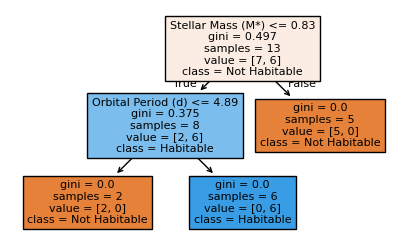

In [152]:
plt.figure(figsize=(5,3))
plot_tree(model, feature_names=['Stellar Mass (M*)', 'Orbital Period (d)'],
            class_names=['Not Habitable', 'Habitable'],
            filled=True)
plt.show()

In [153]:
ypred = model.predict(Xtest)

In [154]:
print(f'Accuracy Score = {metrics.accuracy_score(ytest, ypred)}')

Accuracy Score = 0.6


### Model 2

In [155]:
train_set = learning_set.iloc[5:,:]
test_set = learning_set.iloc[:5,:]

Xtrain = train_set.drop(['P_NAME', 'P_HABITABLE'], axis=1)
Xtest = test_set.drop(['P_NAME', 'P_HABITABLE'], axis=1)
ytrain = train_set.P_HABITABLE
ytest = test_set.P_HABITABLE

In [156]:
model = DecisionTreeClassifier(random_state = 3)
model.fit(Xtrain, ytrain)

DecisionTreeClassifier(random_state=3)

**Note**: _Gini inpurity_ is used by default

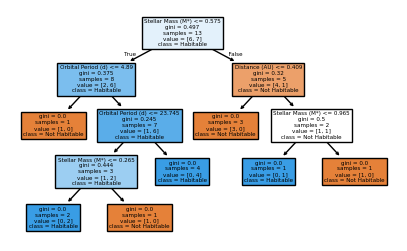

In [157]:
plt.figure(figsize=(5,3))
plot_tree(model, feature_names=['Stellar Mass (M*)', 'Orbital Period (d)', 'Distance (AU)'],
            class_names=['Not Habitable', 'Habitable'],
            filled=True)
plt.show()

In [158]:
ypred = model.predict(Xtest)

In [159]:
print(f'Accuracy Score = {metrics.accuracy_score(ytest, ypred)}')

Accuracy Score = 1.0


## 2 - kNN
```python
sklearn.neighbors.KNeighborsClassifier
```

### Model 1

In [160]:
train_set = learning_set.iloc[:13,:]
test_set = learning_set.iloc[13:,:]

Xtrain = train_set.drop(['P_NAME', 'P_HABITABLE', 'P_DISTANCE'], axis=1)
Xtest = test_set.drop(['P_NAME', 'P_HABITABLE', 'P_DISTANCE'], axis=1)
ytrain = train_set.P_HABITABLE
ytest = test_set.P_HABITABLE

Xtrain.head()

,STTELLAR_MASS,P_ORBITAL_PERIOD
0,0.86,3.60
1,0.85,16.08
2,1.19,7.64
3,0.61,112.30
4,0.98,12.99


In [161]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(Xtrain, ytrain)

KNeighborsClassifier(n_neighbors=3)

In [162]:
ypred = model.predict(Xtest)

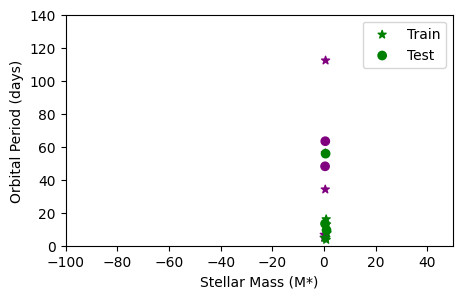

In [163]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.scatter(
    Xtrain['STTELLAR_MASS'], 
    Xtrain['P_ORBITAL_PERIOD'], 
    marker='*', 
    c=ytrain.map({0: 'green', 1: 'purple'}),
    label='Train'
)
ax.scatter(
    Xtest['STTELLAR_MASS'], 
    Xtest['P_ORBITAL_PERIOD'], 
    marker='o', 
    c=ytest.map({0: 'green', 1: 'purple'}), 
    label='Test'
)

ax.set_xlabel('Stellar Mass (M*)')
ax.set_ylabel('Orbital Period (days)')
ax.legend()

ax.set_xlim(-100, 50)
ax.set_ylim(0, 140)

plt.show()

In [164]:
print(f'Accuracy Score = {metrics.accuracy_score(ytest, ypred)}')

Accuracy Score = 0.8


### Model 2

In [165]:
train_set = learning_set.iloc[:13,:]
test_set = learning_set.iloc[13:,:]

Xtrain = train_set.drop(['P_NAME', 'P_HABITABLE', 'P_DISTANCE'], axis=1)
Xtest = test_set.drop(['P_NAME', 'P_HABITABLE', 'P_DISTANCE'], axis=1)
ytrain = train_set.P_HABITABLE
ytest = test_set.P_HABITABLE

In [166]:
scaler = RobustScaler()
scaler.fit(Xtrain)
scaledXTrain = scaler.transform(Xtrain)
scaledXtest = scaler.transform(Xtest)

pd.DataFrame(scaledXTrain, columns=['STELLAR_MASS', 'P_ORBITAL_PERIOD']).head()

,STELLAR_MASS,P_ORBITAL_PERIOD
0,0.472222,-0.183578
1,0.444444,0.060411
2,1.388889,-0.104594
3,-0.222222,1.941544
4,0.805556,0.000000


In [167]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(scaledXTrain, ytrain)

KNeighborsClassifier(n_neighbors=3)

In [168]:
ypred = model.predict(scaledXtest)

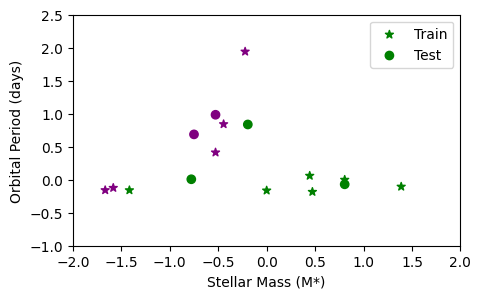

In [169]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.scatter(
    scaledXTrain[:,0], 
    scaledXTrain[:,1], 
    marker='*', 
    c=ytrain.map({0: 'green', 1: 'purple'}),
    label='Train'
)
ax.scatter(
    scaledXtest[:,0], 
    scaledXtest[:,1], 
    marker='o', 
    c=ytest.map({0: 'green', 1: 'purple'}), 
    label='Test'
)

ax.set_xlabel('Stellar Mass (M*)')
ax.set_ylabel('Orbital Period (days)')
ax.legend()

ax.set_xlim(-2, 2)
ax.set_ylim(-1, 2.5)

plt.show()

In [170]:
print(f'Accuracy Score = {metrics.accuracy_score(ytest, ypred)}')

Accuracy Score = 0.8
